In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from datetime import datetime
import pickle



In [17]:
sales = pd.read_c/Users/maithilibhuyar/Desktop/session_data.csvsv("")

**Checking for null values**

In [18]:

sales.isna().sum()

session_id      0
product_name    0
dtype: int64

In [19]:
sales.head()

,session_id,product_name
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber
2,0013eab657eaf2d82d7f1e13023d95c2,onion
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk
4,0013fabde1e543dd541be925266aadbc,dates


In [20]:
print(len(sales))
print(sales.session_id.nunique())
print(sales.product_name.nunique())

345152
165335
396


EDA

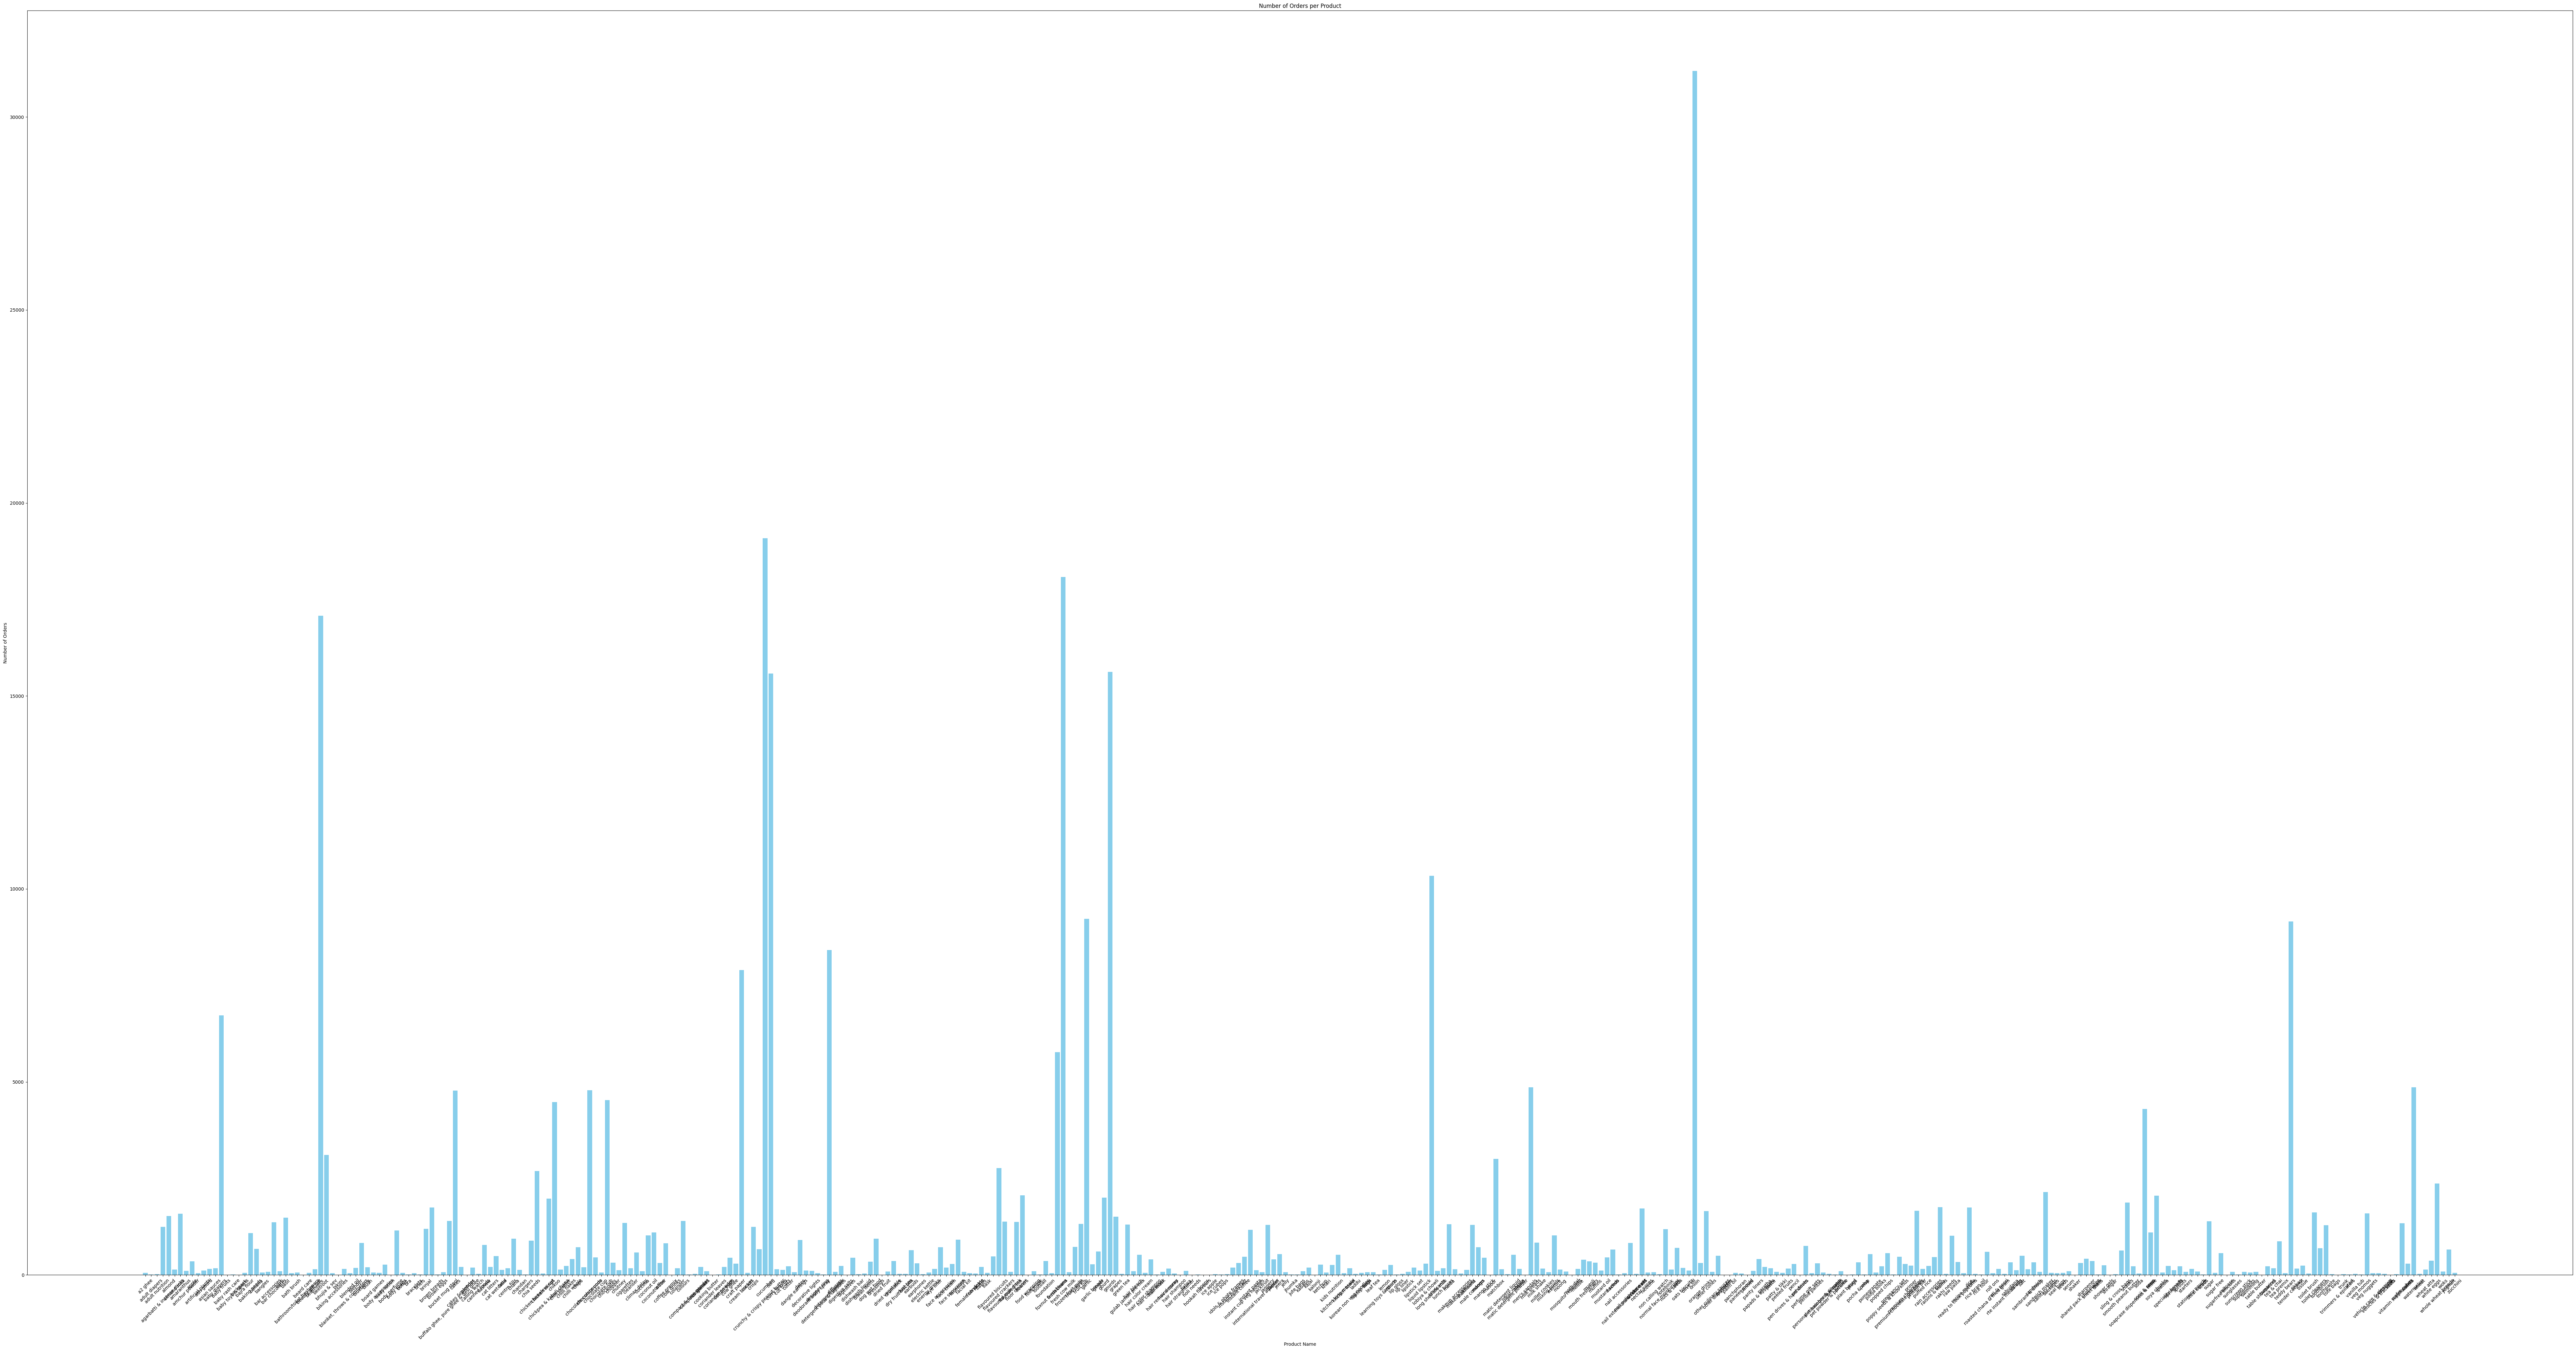

In [21]:
item_counts = sales.groupby(['session_id', 'product_name']).size().reset_index(name='counts')

# Aggregate to count how many people ordered each item and how many times
summary = item_counts.groupby('product_name').agg(
    num_people=('session_id', 'nunique'),
    num_orders=('counts', 'sum')
).reset_index()

# Plot the data
plt.figure(figsize=(100,50))
plt.bar(summary['product_name'], summary['num_orders'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Product')
plt.xticks(rotation=45)
plt.show()

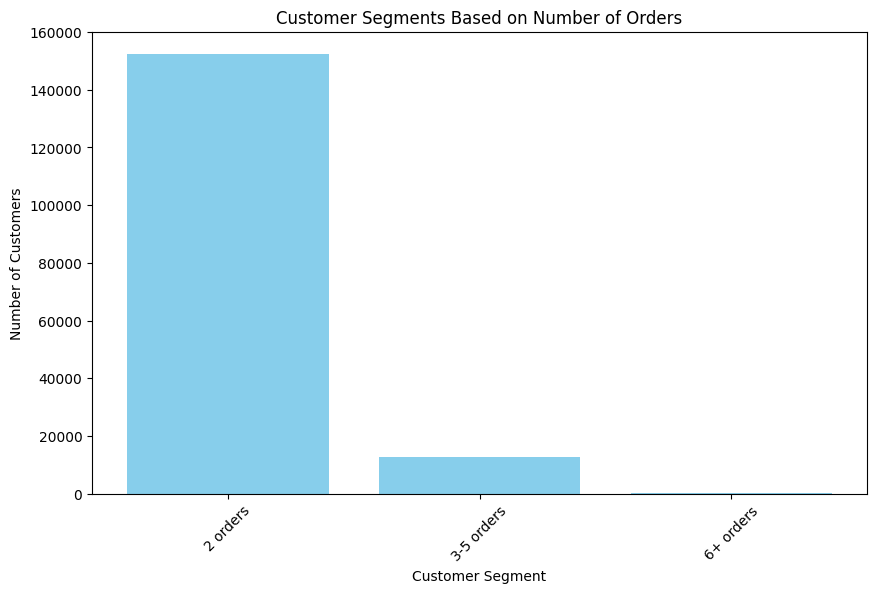

In [22]:
orders_per_customer = sales.groupby('session_id').size().reset_index(name='num_orders')

# Segment customers based on the number of orders
def segment(x):
    if x == 1:
        return '1 order'
    elif x == 2:
        return '2 orders'
    elif x <= 5:
        return '3-5 orders'
    else:
        return '6+ orders'

orders_per_customer['segment'] = orders_per_customer['num_orders'].apply(segment)

# Analyze segments
segment_analysis = orders_per_customer['segment'].value_counts().reset_index()
segment_analysis.columns = ['segment', 'count']

# Plot the segments
plt.figure(figsize=(10, 6))
plt.bar(segment_analysis['segment'], segment_analysis['count'], color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segments Based on Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [23]:
df = pd.DataFrame(sales)

# Distribution of products
product_distribution = df['product_name'].value_counts()
print("Product Distribution:\n", product_distribution)

# Frequency of sessions
session_frequency = df['session_id'].value_counts()
print("\nSession Frequency:\n", session_frequency)

Product Distribution:
 product_name
onion               31196
cucumber            19083
fresh cow milk      18086
beetroot            17077
gourds              15625
                    ...  
shringar                1
suitcase                1
coriander leaves        1
moth dal                1
cola drinks             1
Name: count, Length: 396, dtype: int64

Session Frequency:
 session_id
27d86d946e6ea6d022f12211d61f8ac7    9
46e7a5a9ea314c5e08b15cbdc6a51a17    8
f759181ac5f907209bf187295b92b89d    8
84e42be037b32e6ad6d68edbc5972b10    8
b5e3e95a7d352b517e6256a3d761683e    8
                                   ..
8bcb1a2a1d6d87102fcab5442fb3fc48    2
8bda2b6aaa2059a59058abe1af76b903    2
8be5496778cedb096517b10591c81940    2
8bfa782d56ae6db4b26e972fe0654e93    2
ffcb72279f578ca4cb32c089d8fe8aa4    2
Name: count, Length: 165335, dtype: int64


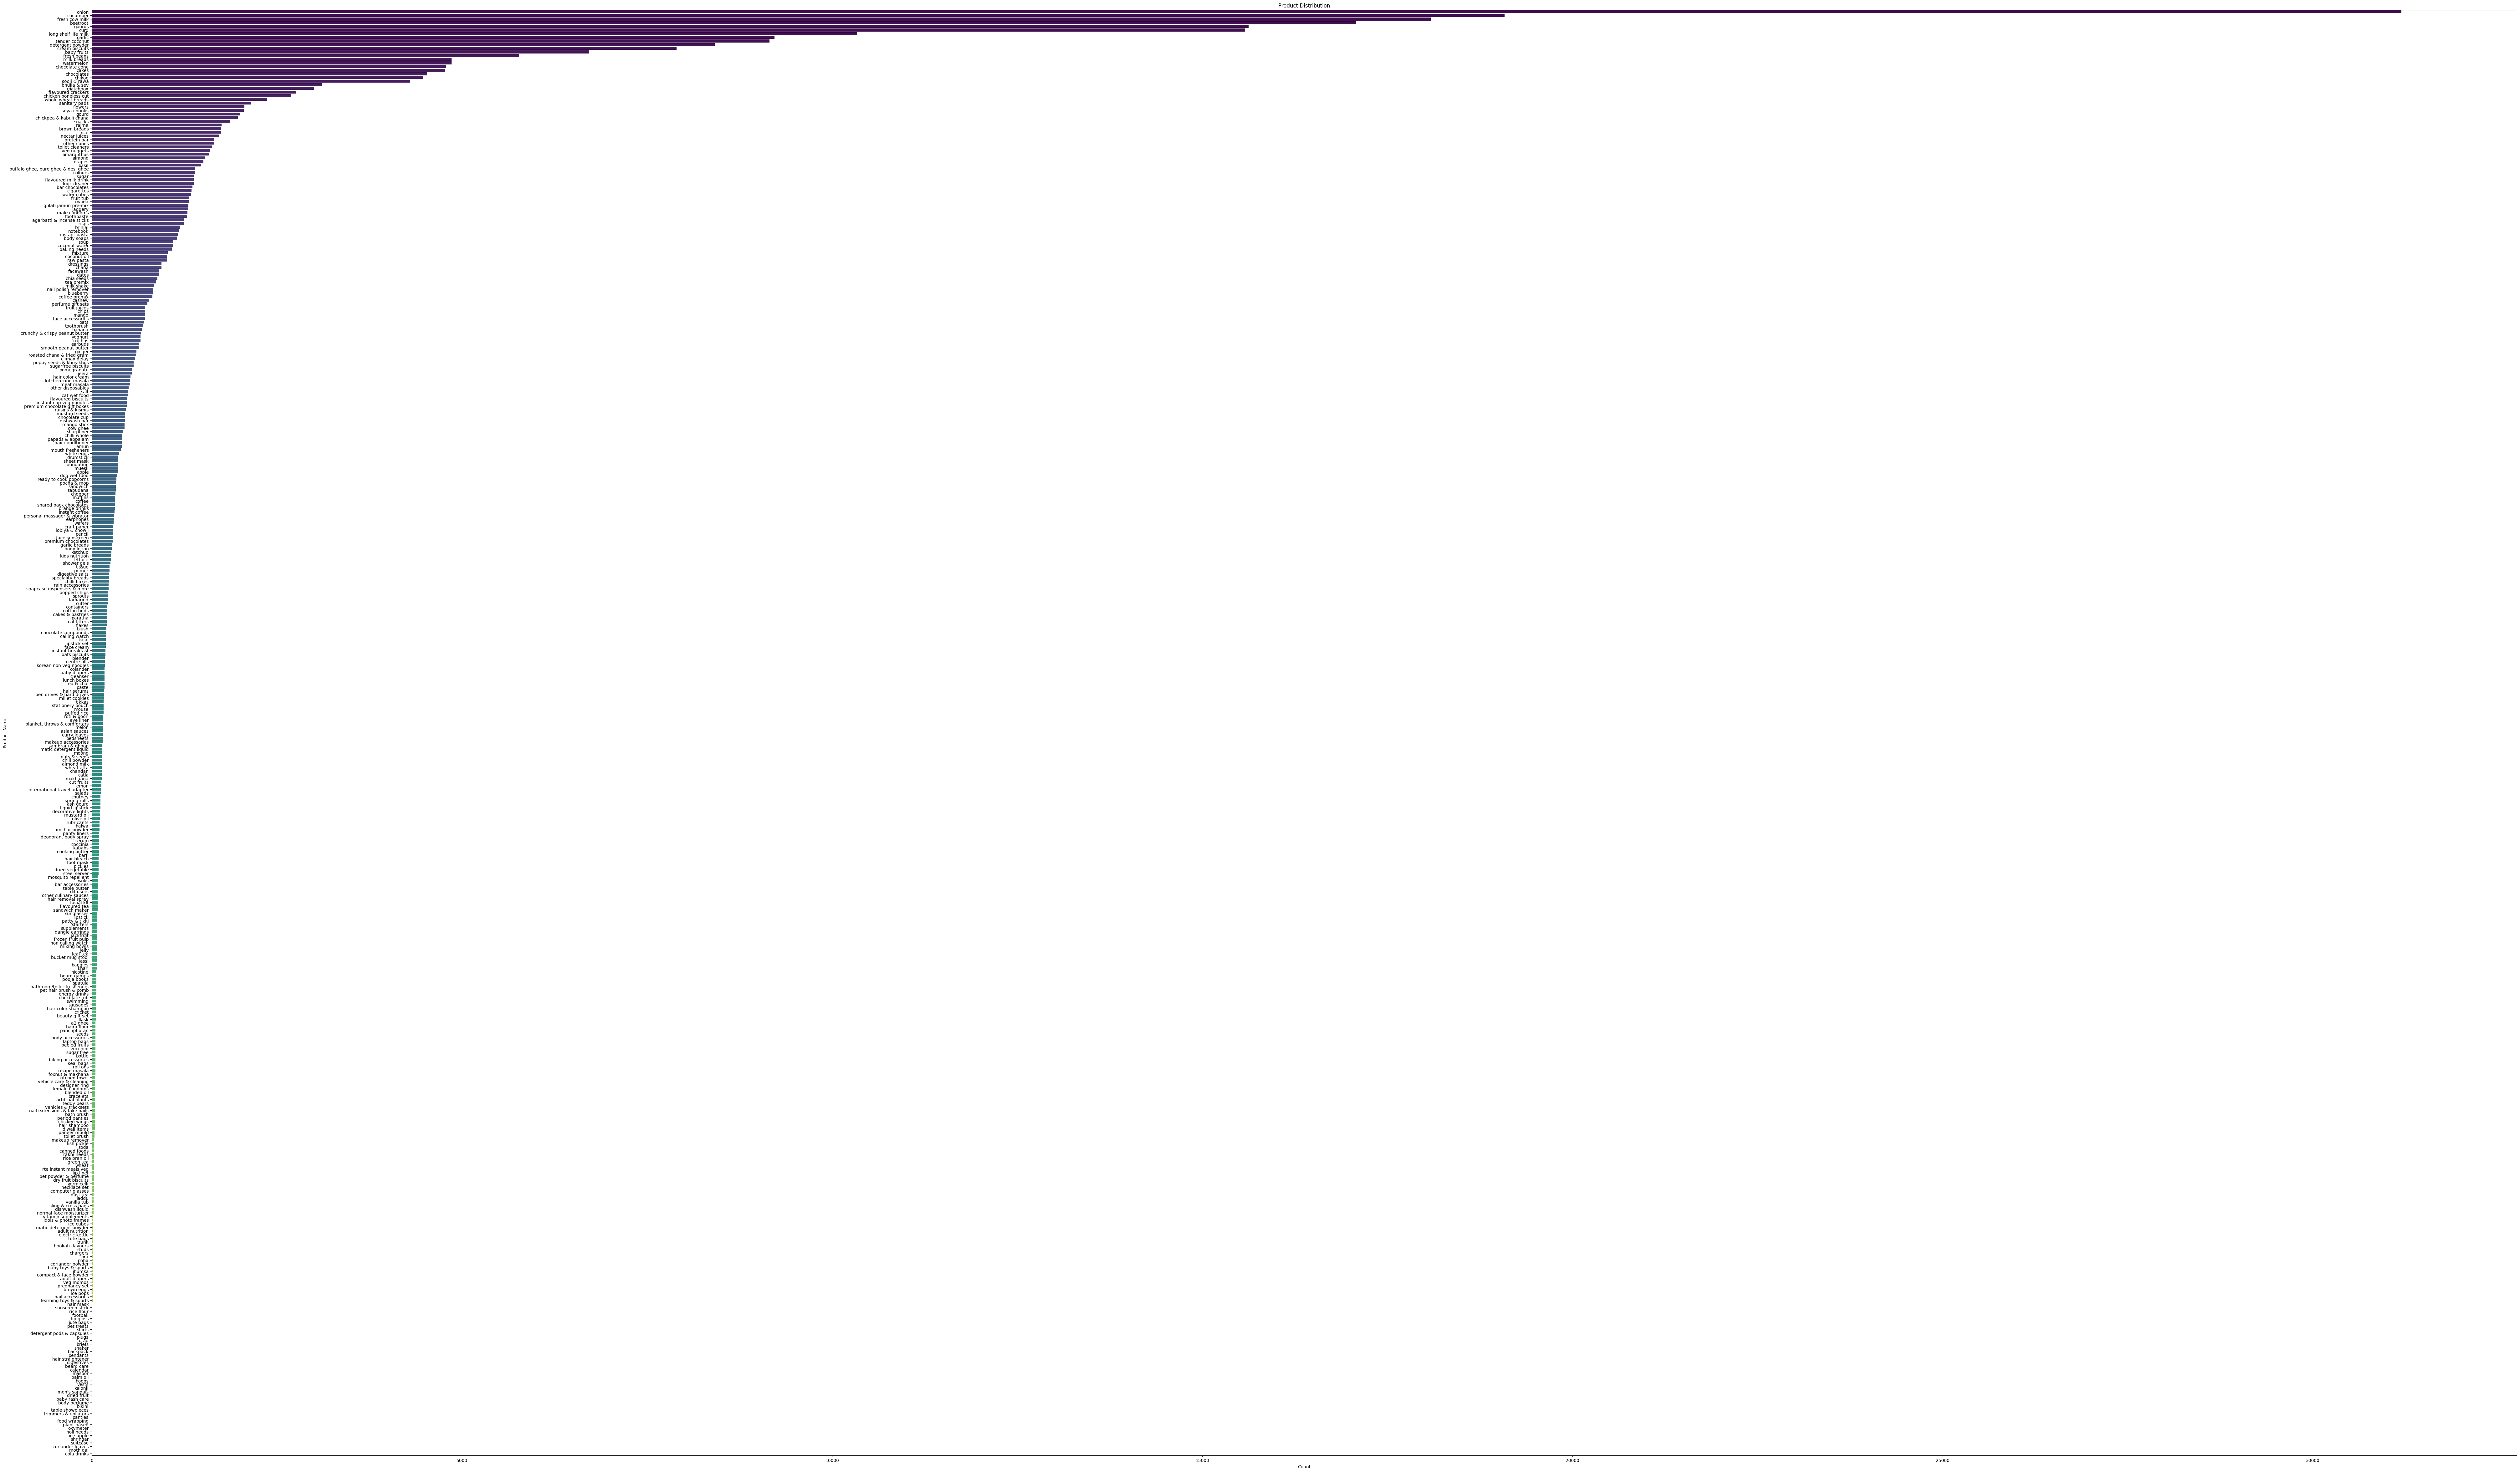

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Product Distribution
plt.figure(figsize=(100, 60))
sns.countplot(y='product_name', data=df, order=df['product_name'].value_counts().index, palette='viridis')
plt.title('Product Distribution')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()


In [25]:
from itertools import combinations
from collections import defaultdict

# Create a co-occurrence matrix
co_occurrence = defaultdict(int)

# Iterate over sessions to count product pairs
for session_id, group in df.groupby('session_id'):
    products = group['product_name'].unique()
    for combo in combinations(products, 2):
        co_occurrence[combo] += 1

# Convert to DataFrame for better readability
co_occurrence_df = pd.DataFrame(co_occurrence.items(), columns=['Product Pair', 'Count'])
print("\nProduct Co-occurrence Matrix:\n", co_occurrence_df)



Product Co-occurrence Matrix:
                               Product Pair  Count
0                   (fresh cow milk, curd)   2233
1               (gourds, rain accessories)      5
2                    (fresh beans, gourds)   1060
3                       (curd, white eggs)     16
4               (almond, detergent powder)     26
...                                    ...    ...
24608         (roti & poori, fruit juices)      1
24609                (garlic, bajra flour)      1
24610             (paneer mould, matchbox)      1
24611               (paneer mould, flakes)      1
24612  (fresh beans, smooth peanut butter)      1

[24613 rows x 2 columns]


In [26]:
# Count the number of unique products per session
df['num_products'] = df.groupby('session_id')['product_name'].transform('nunique')

# Segment customers based on the number of unique products purchased
def segment(x):
    if x == 1:
        return 'Single Product'
    elif x <= 3:
        return 'Small Cart (2-3 products)'
    elif x <= 5:
        return 'Medium Cart (4-5 products)'
    else:
        return 'Large Cart (6+ products)'

df['segment'] = df['num_products'].apply(segment)

# View customer segments
customer_segments = df[['session_id', 'segment']].drop_duplicates()
print("\nCustomer Segmentation:\n", customer_segments)



Customer Segmentation:
                               session_id                    segment
0       000ed966131fcb96e0efc4ff2b716a3e  Small Cart (2-3 products)
2       0013eab657eaf2d82d7f1e13023d95c2  Small Cart (2-3 products)
4       0013fabde1e543dd541be925266aadbc  Small Cart (2-3 products)
6       001dcafde327359bfb3d62903280e23c  Small Cart (2-3 products)
8       00380e30a223b94428c3bb48142f8821  Small Cart (2-3 products)
...                                  ...                        ...
345141  ff4eda33c714f5ef55c527e2caf5f6dd  Small Cart (2-3 products)
345143  ff6f874aaf5d35e3a0be983a1d882875  Small Cart (2-3 products)
345145  ff9df55e6155f8a79a72bcf1af498d18  Small Cart (2-3 products)
345147  ffb73de5b022d80d23ec72a7ce8226fe  Small Cart (2-3 products)
345150  ffcb72279f578ca4cb32c089d8fe8aa4  Small Cart (2-3 products)

[165335 rows x 2 columns]


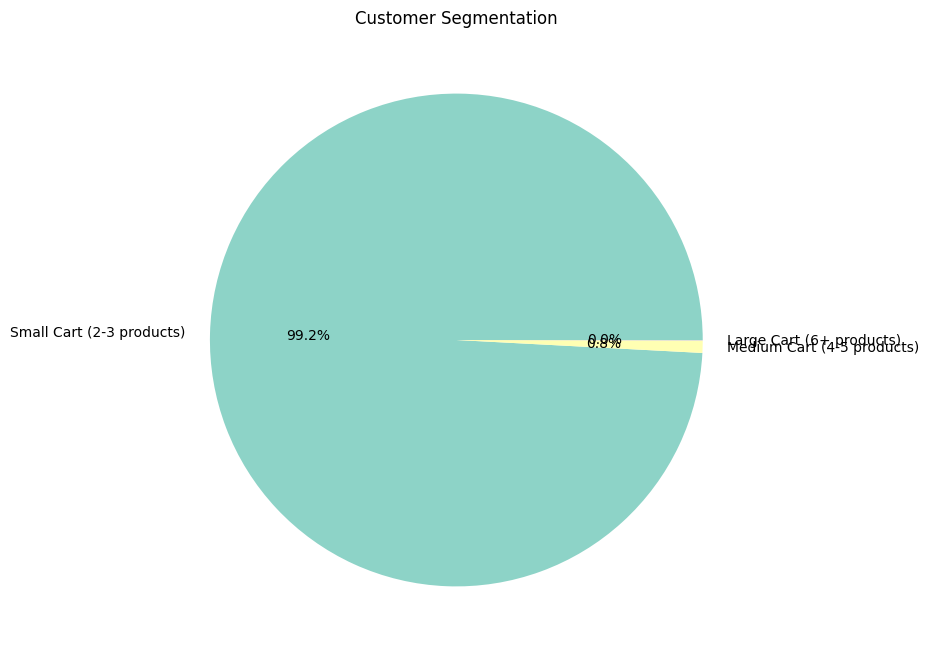

In [27]:
# Plotting Customer Segmentation
segment_distribution = df[['session_id', 'segment']].drop_duplicates()['segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_distribution, labels=segment_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(segment_distribution)))
plt.title('Customer Segmentation')
plt.show()


In [28]:
# Frequently bought items
frequent_items = df['product_name'].value_counts().head(10)
print("\nFrequently Bought Items:\n", frequent_items)

# Optional: If your dataset includes timestamps, you could also analyze seasonal trends
# For now, we’ll skip seasonal trends since the sample data lacks timestamps.

# Product affinity (most common pairs)
top_product_pairs = co_occurrence_df.sort_values(by='Count', ascending=False).head(10)
print("\nTop Product Pairs (Product Affinity):\n", top_product_pairs)



Frequently Bought Items:
 product_name
onion                   31196
cucumber                19083
fresh cow milk          18086
beetroot                17077
gourds                  15625
curd                    15578
long shelf life milk    10336
garlic                   9222
tender coconut           9155
detergent powder         8414
Name: count, dtype: int64

Top Product Pairs (Product Affinity):
                       Product Pair  Count
77            (cucumber, beetroot)   4327
28            (beetroot, cucumber)   4268
54   (onion, long shelf life milk)   2560
155  (long shelf life milk, onion)   2507
0           (fresh cow milk, curd)   2233
191         (curd, fresh cow milk)   2175
17         (onion, tender coconut)   1812
39         (tender coconut, onion)   1806
91              (gourds, beetroot)   1722
26              (beetroot, gourds)   1697


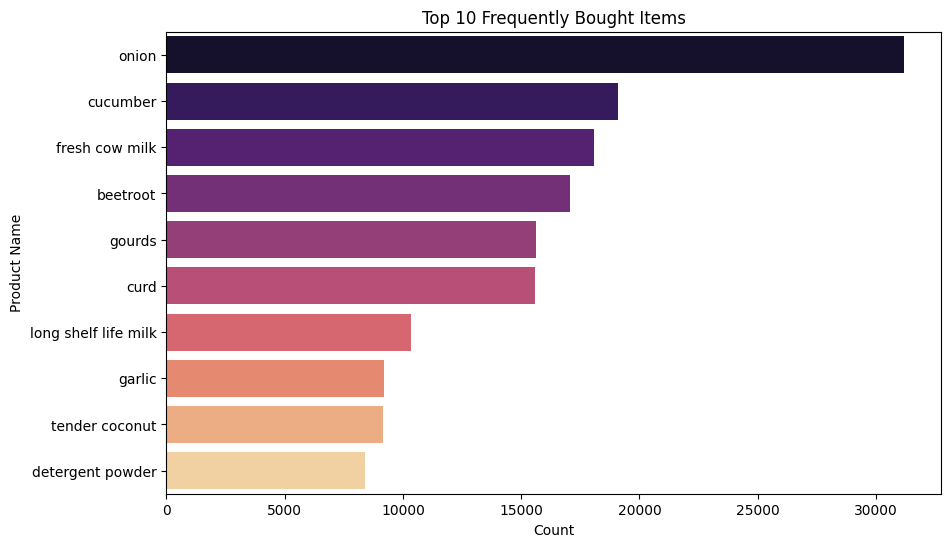

In [29]:
# Plotting Frequently Bought Items
frequent_items = df['product_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=frequent_items.index, x=frequent_items.values, palette='magma')
plt.title('Top 10 Frequently Bought Items')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()


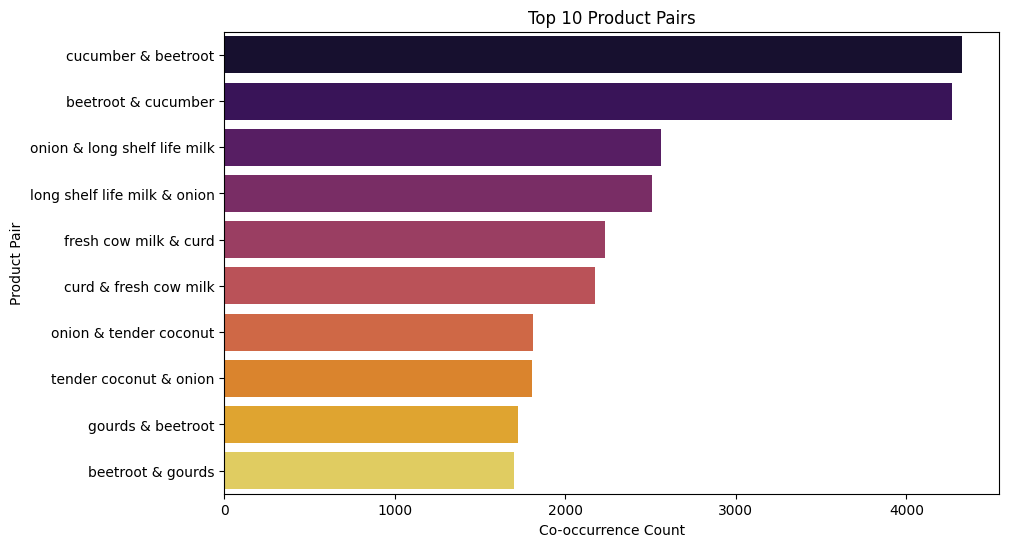

In [30]:
# Plotting Top Product Pairs (Product Affinity)
top_product_pairs = co_occurrence_df.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_product_pairs['Product Pair'].apply(lambda x: f'{x[0]} & {x[1]}'), x=top_product_pairs['Count'], palette='inferno')
plt.title('Top 10 Product Pairs')
plt.xlabel('Co-occurrence Count')
plt.ylabel('Product Pair')
plt.show()


In [31]:
# Handling Duplicates
df.drop_duplicates(inplace=True)

# Ensure correct data types (if needed)
df['session_id'] = df['session_id'].astype(str)
df['product_name'] = df['product_name'].astype(str)

print("Cleaned DataFrame:\n", df)

Cleaned DataFrame:
                               session_id          product_name  num_products  \
0       000ed966131fcb96e0efc4ff2b716a3e              beetroot             2   
1       000ed966131fcb96e0efc4ff2b716a3e              cucumber             2   
2       0013eab657eaf2d82d7f1e13023d95c2                 onion             2   
3       0013eab657eaf2d82d7f1e13023d95c2  long shelf life milk             2   
4       0013fabde1e543dd541be925266aadbc                 dates             2   
...                                  ...                   ...           ...   
345147  ffb73de5b022d80d23ec72a7ce8226fe  long shelf life milk             3   
345148  ffb73de5b022d80d23ec72a7ce8226fe         nectar juices             3   
345149  ffb73de5b022d80d23ec72a7ce8226fe                 onion             3   
345150  ffcb72279f578ca4cb32c089d8fe8aa4                  rice             2   
345151  ffcb72279f578ca4cb32c089d8fe8aa4                 onion             2   

                   

In [32]:
# Encoding categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['product_name_encoded'] = label_encoder.fit_transform(df['product_name'])

print("\nDataFrame with Encoded Product Names:\n", df)



DataFrame with Encoded Product Names:
                               session_id          product_name  num_products  \
0       000ed966131fcb96e0efc4ff2b716a3e              beetroot             2   
1       000ed966131fcb96e0efc4ff2b716a3e              cucumber             2   
2       0013eab657eaf2d82d7f1e13023d95c2                 onion             2   
3       0013eab657eaf2d82d7f1e13023d95c2  long shelf life milk             2   
4       0013fabde1e543dd541be925266aadbc                 dates             2   
...                                  ...                   ...           ...   
345147  ffb73de5b022d80d23ec72a7ce8226fe  long shelf life milk             3   
345148  ffb73de5b022d80d23ec72a7ce8226fe         nectar juices             3   
345149  ffb73de5b022d80d23ec72a7ce8226fe                 onion             3   
345150  ffcb72279f578ca4cb32c089d8fe8aa4                  rice             2   
345151  ffcb72279f578ca4cb32c089d8fe8aa4                 onion             2   


In [33]:
# Aggregating data at the session level
session_aggregated = df.groupby('session_id')['product_name'].apply(list).reset_index()

print("\nSession Aggregated Data:\n", session_aggregated)



Session Aggregated Data:
                               session_id                       product_name
0       0000bc46bf70d6ebb01c8b58f5e619ab             [fresh cow milk, curd]
1       000163cb20c349ae5d6b9cd3343a221a         [gourds, rain accessories]
2       0001978dc214c82cb21a5a3d450ba431              [fresh beans, gourds]
3       0001c0bc9fcff00481a997d89de3d2e0                 [curd, white eggs]
4       0002276867f6d276dc39a3261e30b2ca         [almond, detergent powder]
...                                  ...                                ...
165330  fffed3a44b22a0ad079f5ecf75c38e75                [toothbrush, onion]
165331  ffff24612f86e176e835ca50a98182e1  [milk breads, flavoured crackers]
165332  ffffdfdb1e329a1ffde4f7eef3ff01d8             [fresh cow milk, curd]
165333  ffffeeaa83df2ff6c902dadae7e6ed75      [tender coconut, baby fruits]
165334  fffffcd6989cd65bc9dd67e13d6dadff               [cucumber, beetroot]

[165335 rows x 2 columns]


In [35]:
from sklearn.model_selection import train_test_split


# Get unique session IDs
unique_sessions = df['session_id'].unique()

# Split unique session IDs into training and testing
train_sessions, test_sessions = train_test_split(unique_sessions, test_size=0.3, random_state=42)

# Create training and testing datasets based on the session IDs
train_df = df[df['session_id'].isin(train_sessions)]
test_df = df[df['session_id'].isin(test_sessions)]

print("Training DataFrame:\n", train_df)
print("\nTesting DataFrame:\n", test_df)

Training DataFrame:
                               session_id          product_name  num_products  \
2       0013eab657eaf2d82d7f1e13023d95c2                 onion             2   
3       0013eab657eaf2d82d7f1e13023d95c2  long shelf life milk             2   
4       0013fabde1e543dd541be925266aadbc                 dates             2   
5       0013fabde1e543dd541be925266aadbc              matchbox             2   
6       001dcafde327359bfb3d62903280e23c                 onion             2   
...                                  ...                   ...           ...   
345145  ff9df55e6155f8a79a72bcf1af498d18        chocolate cone             2   
345146  ff9df55e6155f8a79a72bcf1af498d18             earphones             2   
345147  ffb73de5b022d80d23ec72a7ce8226fe  long shelf life milk             3   
345148  ffb73de5b022d80d23ec72a7ce8226fe         nectar juices             3   
345149  ffb73de5b022d80d23ec72a7ce8226fe                 onion             3   

                  

In [37]:
df.head(5)

,session_id,product_name,num_products,segment,product_name_encoded
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot,2,Small Cart (2-3 products),30
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber,2,Small Cart (2-3 products),106
2,0013eab657eaf2d82d7f1e13023d95c2,onion,2,Small Cart (2-3 products),265
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk,2,Small Cart (2-3 products),220
4,0013fabde1e543dd541be925266aadbc,dates,2,Small Cart (2-3 products),112


In [58]:
df.head(10)

,session_id,product_name,category
0,000ed966131fcb96e0efc4ff2b716a3e,beetroot,vegetable
1,000ed966131fcb96e0efc4ff2b716a3e,cucumber,vegetable
2,0013eab657eaf2d82d7f1e13023d95c2,onion,vegetable
3,0013eab657eaf2d82d7f1e13023d95c2,long shelf life milk,dairy
4,0013fabde1e543dd541be925266aadbc,dates,vegetable
5,0013fabde1e543dd541be925266aadbc,matchbox,vegetable
6,001dcafde327359bfb3d62903280e23c,onion,vegetable
7,001dcafde327359bfb3d62903280e23c,brinjal,vegetable
8,00380e30a223b94428c3bb48142f8821,cucumber,vegetable
9,00380e30a223b94428c3bb48142f8821,gourds,vegetable


In [74]:

# Group by session_id and aggregate product_name into lists
grouped = df.groupby('session_id')['product_name'].apply(list).reset_index()



In [75]:
grouped.head()

,session_id,product_name
0,0000bc46bf70d6ebb01c8b58f5e619ab,"[fresh cow milk, curd]"
1,000163cb20c349ae5d6b9cd3343a221a,"[gourds, rain accessories]"
2,0001978dc214c82cb21a5a3d450ba431,"[fresh beans, gourds]"
3,0001c0bc9fcff00481a997d89de3d2e0,"[curd, white eggs]"
4,0002276867f6d276dc39a3261e30b2ca,"[almond, detergent powder]"


In [76]:
product_list = grouped['product_name'].tolist()

In [77]:
pip install mlxtend


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Fit and transform the data into one-hot encoding format
one_hot_trans = te.fit(product_list).transform(product_list)

# Convert the result into a DataFrame
one_hot_trans_df = pd.DataFrame(one_hot_trans, columns=te.columns_)

# Display the DataFrame
print(one_hot_trans_df)

        a2 ghee  adult diapers  adult nutrition  agarbatti & incense sticks  \
0         False          False            False                       False   
1         False          False            False                       False   
2         False          False            False                       False   
3         False          False            False                       False   
4         False          False            False                       False   
...         ...            ...              ...                         ...   
165330    False          False            False                       False   
165331    False          False            False                       False   
165332    False          False            False                       False   
165333    False          False            False                       False   
165334    False          False            False                       False   

        almond  almond milk  amaranthus  amchur pow

In [79]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Convert the result into a DataFrame
one_hot_trans_df = pd.DataFrame(one_hot_trans, columns=te.columns_)

# Apply the Apriori algorithm
freq_prod = apriori(one_hot_trans_df, min_support=0.02, use_colnames=True)

# Generate association rules with a lift value greater than 1
rules = association_rules(freq_prod, metric="lift", min_threshold=1)

# Get the top ten rules sorted by confidence
top_ten = rules.sort_values('confidence', ascending=False).head(10)

# Display the top ten rules
print(top_ten)

              antecedents             consequents  antecedent support  \
0              (beetroot)              (cucumber)            0.103287   
7  (long shelf life milk)                 (onion)            0.062515   
1              (cucumber)              (beetroot)            0.115420   
9        (tender coconut)                 (onion)            0.055372   
4                  (curd)        (fresh cow milk)            0.094221   
5        (fresh cow milk)                  (curd)            0.109390   
3                (gourds)              (beetroot)            0.094505   
2              (beetroot)                (gourds)            0.103287   
6                 (onion)  (long shelf life milk)            0.188684   
8                 (onion)        (tender coconut)            0.188684   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.115420  0.051985    0.503309  4.360662  0.040064    1.780944   
7            0.188684  0.030647    0.4

In [80]:

# Convert to DataFrame
df = pd.DataFrame(rules)

# Function to get recommendations based on an item
def get_recommendations(item):
    # Filter the rules where the antecedent contains the given item
    filtered_rules = df[df['antecedents'].apply(lambda x: item in x)]
    # Sort by confidence in descending order
    sorted_rules = filtered_rules.sort_values(by='confidence', ascending=False)
    
    recommendations = []
    for index, row in sorted_rules.iterrows():
        recommendations.extend(row['consequents'])
    
    # Remove duplicates
    recommendations = list(set(recommendations))
    
    return recommendations

In [88]:
input_item = input("Enter an item: ").strip()
recommendations = get_recommendations(input_item)
print(f"Recommendations for {input_item}: {recommendations}")

Recommendations for onion: ['tender coconut', 'long shelf life milk']


In [89]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split


# Convert transaction data to one-hot encoded DataFrame
te = TransactionEncoder()
one_hot_trans = te.fit(product_list).transform(product_list)
one_hot_trans_df = pd.DataFrame(one_hot_trans, columns=te.columns_)

# Split the data into training and testing sets
train_data, test_data = train_test_split(one_hot_trans_df, test_size=0.3, random_state=42)


In [90]:
# Apply the Apriori algorithm on training data
freq_prod = apriori(train_data, min_support=0.02, use_colnames=True)

# Generate association rules with a lift value greater than 1
rules = association_rules(freq_prod, metric="lift", min_threshold=1)


In [91]:
def get_recommendations(rules, input_items, top_n=5):
    recommendations = []
    for idx, row in rules.iterrows():
        if any(item in row['antecedents'] for item in input_items):
            recommendations.extend(list(row['consequents']))
    return list(set(recommendations))[:top_n]

# Generate ground truth and predicted recommendations for the test data
y_true = []
y_pred = []

for index, row in test_data.iterrows():
    input_items = row[row == 1].index.tolist()
    true_items = set(input_items)
    
    # Generate recommendations for the current transaction
    recommended_items = get_recommendations(rules, input_items)
    
    # Create ground truth vector
    y_true_vector = [1 if item in true_items else 0 for item in te.columns_]
    y_true.append(y_true_vector)
    
    # Create predicted vector
    y_pred_vector = [1 if item in recommended_items else 0 for item in te.columns_]
    y_pred.append(y_pred_vector)


In [93]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score, accuracy_score

# Flatten the lists for evaluation
y_true_flat = np.array([item for sublist in y_true for item in sublist])
y_pred_flat = np.array([item for sublist in y_pred for item in sublist])

# Calculate Precision, Recall, F1 Score, and Accuracy
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)
accuracy = accuracy_score(y_true_flat, y_pred_flat)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Calculate NDCG for each user
ndcg_scores = [ndcg_score([y_true[i]], [y_pred[i]]) for i in range(len(y_true))]

# Print the average NDCG score
print(f"NDCG: {np.mean(ndcg_scores):.2f}")

# Hit Rate @ K (e.g., K = 3)
def hit_rate_at_k(y_true, y_pred, k):
    hits = 0
    for true, pred in zip(y_true, y_pred):
        if sum(true[i] for i in np.argsort(pred)[-k:]) > 0:
            hits += 1
    return hits / len(y_true)

# Calculate Hit Rate @ 3
hit_rate_3 = hit_rate_at_k(y_true, y_pred, 3)
print(f"Hit Rate @ 3: {hit_rate_3:.2f}")

# Mean Reciprocal Rank (MRR)
def mean_reciprocal_rank(y_true, y_pred):
    rr_sum = 0
    for true, pred in zip(y_true, y_pred):
        sorted_pred_indices = np.argsort(pred)[::-1]
        for rank, index in enumerate(sorted_pred_indices, start=1):
            if true[index] == 1:
                rr_sum += 1 / rank
                break
    return rr_sum / len(y_true)

# Calculate MRR
mrr = mean_reciprocal_rank(y_true, y_pred)
print(f"MRR: {mrr:.2f}")

# Mean Average Precision (MAP)
def average_precision(y_true, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]
    relevant = 0
    score = 0
    for rank, idx in enumerate(sorted_indices, start=1):
        if y_true[idx] == 1:
            relevant += 1
            score += relevant / rank
    return score / sum(y_true)

def mean_average_precision(y_true, y_pred):
    return np.mean([average_precision(y_true[i], y_pred[i]) for i in range(len(y_true))])

# Calculate MAP
map_score = mean_average_precision(y_true, y_pred)
print(f"MAP: {map_score:.2f}")


Precision: 0.27
Recall: 0.14
F1 Score: 0.19
Accuracy: 0.99
NDCG: 0.28
Hit Rate @ 3: 0.15
MRR: 0.15
MAP: 0.14
